# Step 1 - Import library, upload data, data exploration


### 1.1. Import library
- Import những thư viện tự viết là chính
- Thêm 1 số thư viện cần thì nên làm

In [1]:
# 1. Import library
import lib.step1ml_utilis_summaryPre_processing as pre
#import lib.step2ml_utils_feature_selection as fea
##mport lib.step3ml_utils_model_design_testing_regression as reg
#import lib.step4ml_utils_model_design_testing_explainability as exp
#import lib.step5ml_utils_model_design_testing_visualize_models as vis
#import lib.step6ml_utils_model_design_testing_geospatial_analysis as geo
#import lib.step9ml_Text_Kmeans_Clustering as clu
import matplotlib
import matplotlib_inline
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

### 1.2. Upload Data
- Có hàm viết về upload file => hạn chế dùng trực tiếp hàm môi trường jupyter notebook

In [2]:
# 2. Upload data => name file: House_data.xlsx
dir_file = "data/avocado.csv"
names = ['Id','Date','AveragePrice','Total_Volume','Item_4046','Item_4225','Item_4770','Total_Bags','Small_Bags','Large_Bags','XLarge_Bags','type','year','region']
df = pre.loadData(file_dir=dir_file, names=names)
df = df.iloc[1: , :]

### 1.3. Summary process
- 5 Dòng đầu tiên/ 5 dòng cuối => Xem dữ liệu thế và có cách nhìn về dữ liệu trước, phỏng đoán về dữ liệu
- Nhìn vào xem kiểu dữ liệu đúng chưa, nếu chưa cần phân tích tiếp
- Xem dữ liệu có những liệu lỗi không: NAN, NULL
- Có thể sử dụng thư viện profile report để nhìn qua dữ liệu và nó sẽ xuyên xuốt trong quá trình làm tiền xử lý dữ liệu
- Xem tỉ lệ dữ liệu duplicate => tìm hiểu nguyên nhân và cách xử lý nó => Thường thì sẽ xóa

In [3]:
# Xem 5 thông tin đầu
pre.startInformation(df=df,choose="head", head=5)

close


,Id,Date,AveragePrice,Total_Volume,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
1,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
3,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
4,3.0,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.4,133.76,0.0,conventional,2015,Albany
5,4.0,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Xem tail
pre.startInformation(df=df,choose="tail", head=5)

close


,Id,Date,AveragePrice,Total_Volume,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
18240,2.0,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18241,3.0,2018-03-04,1.54,17393.3,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18242,4.0,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18243,5.0,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18244,6.0,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18245,7.0,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18246,8.0,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.8,0.0,organic,2018,WestTexNewMexico
18247,9.0,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.8,42.31,0.0,organic,2018,WestTexNewMexico
18248,10.0,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.0,0.0,organic,2018,WestTexNewMexico
18249,11.0,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
# Thông tin về dữ liệu
pre.startInformation(df=df,choose="info", head=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 1 to 18249
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            18249 non-null  float64
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  object 
 3   Total_Volume  18249 non-null  object 
 4   Item_4046     18249 non-null  float64
 5   Item_4225     18249 non-null  float64
 6   Item_4770     18249 non-null  float64
 7   Total_Bags    18249 non-null  object 
 8   Small_Bags    18249 non-null  object 
 9   Large_Bags    18249 non-null  object 
 10  XLarge_Bags   18249 non-null  object 
 11  type          18249 non-null  object 
 12  year          18249 non-null  object 
 13  region        18249 non-null  object 
dtypes: float64(4), object(10)
memory usage: 1.9+ MB
close


In [6]:
# Xem dữ liệu có NAN
pre.startInformation(df=df,choose="nan")

close


Id              0
Date            0
AveragePrice    0
Total_Volume    0
Item_4046       0
Item_4225       0
Item_4770       0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
# Xem dữ liệu null
pre.startInformation(df=df, choose="null")

close


Id              0
Date            0
AveragePrice    0
Total_Volume    0
Item_4046       0
Item_4225       0
Item_4770       0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
# Xem dữ liệu bao nhiêu dòng và cột
pre.startInformation(df=df,choose="shape")

close


(18249, 14)

In [9]:
# Sự dụng thư viện profile report
# pre.startInformation(df=df,choose="profile")

In [10]:
# Xem tỉ lệ dữ liệu duplicate => Đưa ra quyết định hoặc tìm hiểu vì sao dữ liệu bị lỗi
pre.percentDuplicates(df=df)

close


0

In [11]:
# Xóa dữ liệu double
data = pre.deleteDuplicates(df=df)
pre.percentDuplicates(df=data)

close
close


0

### Nhận xét:
    - Dữ liệu không double
    - Kiểu dữ liệu chưa đúng, cần thay đổi

### 1.4. Overview dữ liệu theo trực quan hóa và dataframe
- Trực quan hóa: dữ liệu là continious hay category
- Dataframe dữ liệu continious hay category: Biết được min và max/ NAS: dữ liệu nan và null / kiểu dữ liệu dự kiến
- Và biết về tương đối về dữ liệu

 Categerocial   Numerical   NaN 


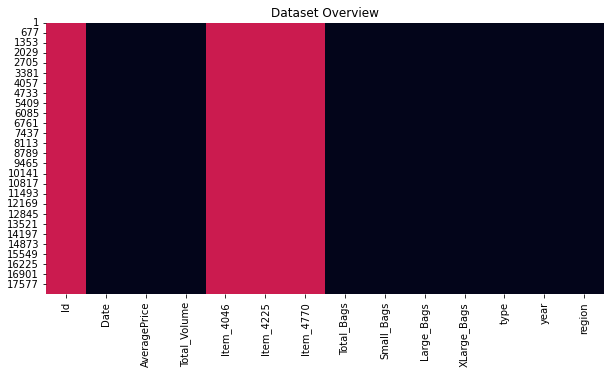

(Text(0.5, 1.0, 'Dataset Overview'), None)

In [12]:
# Nhìn biểu đồ xem dự đoán xem dữ liệu continious hay category
pre.df_overview(df=data, choose="visualization")

In [13]:
# Trực quan hóa dữ liệu overview dataset
pre.df_overview(df=data, columns=['Feature', 'Type_Feature', 'NAS', 'Check_data'])

Shape: (18249, 14)
-----------------


,Feature,Type_Feature,NAS,Check_data
0,Id,Continious,Nas: 0(0%),Min-Max: (0)-(52)
1,Date,categorical,Nas: 0(0%),Categories: 169
2,AveragePrice,categorical,Nas: 0(0%),Categories: 259
3,Total_Volume,categorical,Nas: 0(0%),Categories: 18237
4,Item_4046,Continious,Nas: 0(0%),Min-Max: (0)-(22743616)
5,Item_4225,Continious,Nas: 0(0%),Min-Max: (0)-(20470572)
6,Item_4770,Continious,Nas: 0(0%),Min-Max: (0)-(2546439)
7,Total_Bags,categorical,Nas: 0(0%),Categories: 18097
8,Small_Bags,categorical,Nas: 0(0%),Categories: 17321
9,Large_Bags,categorical,Nas: 0(0%),Categories: 15082


### Nhận xét:
1. Sai kiểu dữ liệu: Date, AveragePrice, Total_Volume, Total_Bags, Small_Bags, Large_Bags, XLarge_Bags, year
2. Cần check lại:
    - Tổng total_volumn <> total các item cộng lại
    - Tổng total_bags = Small_Bags + Large_Bags + XLarge_Bags
### Việc cần làm
1. Chỉnh lại kiểu dữ liệu
2. Cleaning Data
3. Thực hiện phân tích data analysis
4. Xem xét lại các thuộc tính hiểu về thuộc tính

# Step 2 - Data Cleaning - Làm sạch dữ liệu

## A. Làm sạch dữ liệu với continious

### 2.1. Xem dữ liệu continious bị missing value
- Dự đoán những thuộc tính là continious => làm 1 list liên quan đến lst_continious
- Dùng hàm filterSpecialCharacter thực hiện xem những ký tự đặc biệt trong dữ liệu
- Điều chỉnh dữ liệu bị ký hiệu đặc biệt bằng các hàm mode, median, mean hoặc để bằng 0 nếu không đúng => Nếu được dụng thuật toán
- Check lại những thuộc tính đã chỉnh
- Sau đó chuyển đổi kiểu dữ liệu => Nếu fail tìm nguyên nhân
- Làm sao kết quả cuối cùng là chuyển kiểu dữ liệu cho các thuộc tính kiểu continious không bị missing value

In [14]:
# Check các ký tự đặc biệt trong dữ liệu số
lst_continious = ['AveragePrice', 'Total_Volume', 'Item_4046', 'Item_4225', 'Item_4770', 'Total_Bags', 'Small_Bags','Large_Bags', 'XLarge_Bags']
pre.filterSpecialCharacter(df=data[lst_continious])

close
close


,AveragePrice,Total_Volume,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags


### 2.2. Chuyển đổi dữ liệu missing value vs thuộc tính continious
- Chuyển dữ liệu qua hàm changeToAstype để xem dữ liệu đúng không và xem lại
- Cần xem lại thông tin xem kiểu dữ liệu đã ok chưa

In [15]:
data = df.copy()

In [16]:
# Chuyển kiểu dữ liệu cho thuộc tính
# Chuyển đổi dữ liệu date
lst_float = ['AveragePrice', 'Total_Volume', 'Item_4046', 'Item_4225', 'Item_4770', 'Total_Bags', 'Small_Bags','Large_Bags', 'XLarge_Bags']
lst_int = ['Id', 'year']
lst_date = 'Date'
pre.changeToAstype(df=data, lst_float=lst_float, lst_int=lst_int)
pre.changeToAstype_date(df=data, feature_date=lst_date)

,Id,Date,AveragePrice,Total_Volume,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
1,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
3,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
4,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
5,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18246,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18247,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18248,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [17]:
pre.startInformation(df=data,choose="info")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 1 to 18249
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            18249 non-null  int32         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total_Volume  18249 non-null  float64       
 4   Item_4046     18249 non-null  float64       
 5   Item_4225     18249 non-null  float64       
 6   Item_4770     18249 non-null  float64       
 7   Total_Bags    18249 non-null  float64       
 8   Small_Bags    18249 non-null  float64       
 9   Large_Bags    18249 non-null  float64       
 10  XLarge_Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int32         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int32(2), object(2)
memory usage: 1.8+ MB
close


### Nhận xét: 
1. Dữ liêu đã chuyển kiểu theo ý muốn
2. Cần phải thực hiện Cleaning data

## B. CLEANING BY FEATURE

#### 2.3. Xem lại thông tin dữ liệu lại
- Có bao nhiêu cột
- Giá trị trong cột thế nào dùng hàm: checkDtypesDataAndMissingvalues
- Overview dữ liệu lại 1 lần trước khi tiến hành việc khác
- Đưa ra nhận xét cho công việc tiếp theo

In [18]:
# Xem lại danh sách các cột dữ liệu
pre.startInformation(df=data, choose="columns")


close


Index(['Id', 'Date', 'AveragePrice', 'Total_Volume', 'Item_4046', 'Item_4225',
       'Item_4770', 'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags',
       'type', 'year', 'region'],
      dtype='object')

In [19]:
# Kiểm tra unique values và dtype của từng cột dữ liệu
check_feature = pre.checkDtypesDataAndMissingvalues(df=data, chooses="table")
check_feature

close


,Kiểm tra biến,giá trị,Số biến,Kiểu dữ liệu
0,Id,53,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",int32
1,Date,169,"[2015-01-04T00:00:00.000000000, 2015-01-11T00:...",datetime64[ns]
2,AveragePrice,259,"[0.44, 0.46, 0.48, 0.49, 0.51, 0.52, 0.53, 0.5...",float64
3,Total_Volume,18237,"[84.56, 379.82, 385.55, 419.98, 472.82, 482.26...",float64
4,Item_4046,17702,"[0.0, 1.0, 1.13, 1.19, 1.2, 1.21, 1.22, 1.23, ...",float64
5,Item_4225,18103,"[0.0, 1.26, 1.28, 1.3, 1.31, 1.32, 1.64, 2.39,...",float64
6,Item_4770,12071,"[0.0, 0.83, 1.0, 1.01, 1.09, 1.11, 1.12, 1.15,...",float64
7,Total_Bags,18097,"[0.0, 3.09, 3.11, 3.19, 3.33, 6.14, 6.18, 6.24...",float64
8,Small_Bags,17321,"[0.0, 2.52, 2.57, 2.73, 2.79, 2.95, 2.96, 3.06...",float64
9,Large_Bags,15082,"[0.0, 0.97, 1.3, 1.33, 1.38, 1.44, 1.48, 1.55,...",float64


 Categerocial   Numerical   NaN 


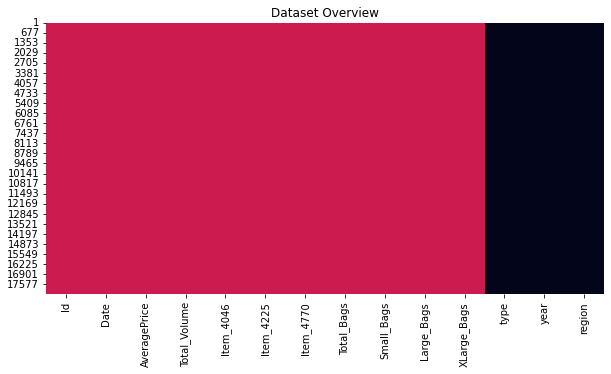

(Text(0.5, 1.0, 'Dataset Overview'), None)

In [20]:
# Overview dữ liệu lại 1 lần nữa
pre.df_overview(df=data, choose="visualization")

### Nhận xét:
1. Hiểu hơn về thuộc tính, chưa hiểu thuộc tính ID: xuất hiện giá trị từ 1-52 vậy ý nghĩa của nó là gì ?
2. Thực hiện chi tiết các thuộc tính từ trên xuống dưới

### 2.4. Detail Cleaning by feature
- Thứ tự thực hiện từng thuộc tính từ trái sang phải theo thứ tự cột

### 2.4.1. Id
- Phải hiểu vì sao ID được đánh từ 1 - 52 xem có ý nghĩa ko ? Có thể là dữ liểu của 52 tuần


In [21]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='Id') 

close
close


Series([], Name: Id, dtype: int32)

In [22]:
# AveragePrice
fea_id = pre.change_feature_seriesToDataframe(df=data, lst_feature='Id', names='fea_id')
fea_id

,fea_id
1,0
2,1
3,2
4,3
5,4
...,...
18245,7
18246,8
18247,9
18248,10


### 2.4.2. Date
- Kiểu dữ liệu đã chuyển về đúng với kiểu mong muốn là datetime64(ns)
- Thêm thuộc tính:
    1. year: là số năm
    2. month: là số tháng
    3. weekly: là số tuần của 1 năm
    4. quarter: là số quý của 1 năm
    6. Daily: là số ngày trong tuần

In [23]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='Date') 

close
close


Series([], Name: Date, dtype: datetime64[ns])

In [24]:
# Diện tích
fea_date = pre.change_feature_seriesToDataframe(df=data, lst_feature='Date', names='fea_date')
fea_date

,fea_date
1,2015-12-27
2,2015-12-20
3,2015-12-13
4,2015-12-06
5,2015-11-29
...,...
18245,2018-02-04
18246,2018-01-28
18247,2018-01-21
18248,2018-01-14


In [25]:
fea_date = pre.date_add_feature(df=fea_date, feature_date='fea_date')
fea_date

,fea_date,fea_year,fea_month,fea_day,fea_weekofyear,fea_daily
1,2015-12-27,2015,12,27,52,6
2,2015-12-20,2015,12,20,51,6
3,2015-12-13,2015,12,13,50,6
4,2015-12-06,2015,12,6,49,6
5,2015-11-29,2015,11,29,48,6
...,...,...,...,...,...,...
18245,2018-02-04,2018,2,4,5,6
18246,2018-01-28,2018,1,28,4,6
18247,2018-01-21,2018,1,21,3,6
18248,2018-01-14,2018,1,14,2,6


### 2.4.3. AveragePrice

In [26]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='AveragePrice') 


close
close


Series([], Name: AveragePrice, dtype: float64)

In [27]:
# AveragePrice
fea_average_price = pre.change_feature_seriesToDataframe(df=data, lst_feature='AveragePrice', names='fea_average_price')
fea_average_price

,fea_average_price
1,1.33
2,1.35
3,0.93
4,1.08
5,1.28
...,...
18245,1.63
18246,1.71
18247,1.87
18248,1.93


### 2.4.4. Total_Volume

In [28]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='Total_Volume') 

close
close


Series([], Name: Total_Volume, dtype: float64)

In [29]:
# Total_Volume
fea_total_Volume = pre.change_feature_seriesToDataframe(df=data, lst_feature='Total_Volume', names='fea_total_Volume')
fea_total_Volume

,fea_total_Volume
1,64236.62
2,54876.98
3,118220.22
4,78992.15
5,51039.60
...,...
18245,17074.83
18246,13888.04
18247,13766.76
18248,16205.22


### 2.4.5. Item_4046

In [30]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='Item_4046') 

close
close


Series([], Name: Item_4046, dtype: float64)

In [31]:
# Total_Volume
fea_Item_4046 = pre.change_feature_seriesToDataframe(df=data, lst_feature='Item_4046', names='fea_item_4046')
fea_Item_4046

,fea_item_4046
1,1036.74
2,674.28
3,794.70
4,1132.00
5,941.48
...,...
18245,2046.96
18246,1191.70
18247,1191.92
18248,1527.63


### 2.4.6. Item_4225

In [32]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='Item_4225') 

close
close


Series([], Name: Item_4225, dtype: float64)

In [33]:
# Total_Volume
fea_item_4225 = pre.change_feature_seriesToDataframe(df=data, lst_feature='Item_4225', names='fea_item_4225')
fea_item_4225

,fea_item_4225
1,54454.85
2,44638.81
3,109149.67
4,71976.41
5,43838.39
...,...
18245,1529.20
18246,3431.50
18247,2452.79
18248,2981.04


### 2.4.7. Item_4770

In [34]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='Item_4770') 

close
close


Series([], Name: Item_4770, dtype: float64)

In [35]:
# Total_Volume
fea_item_4770 = pre.change_feature_seriesToDataframe(df=data, lst_feature='Item_4770', names='fea_item_4770')
fea_item_4770

,fea_item_4770
1,48.16
2,58.33
3,130.50
4,72.58
5,75.78
...,...
18245,0.00
18246,0.00
18247,727.94
18248,727.01


### 2.4.8. Total_Bags

In [36]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='Total_Bags') 

close
close


Series([], Name: Total_Bags, dtype: float64)

In [37]:
# Total_Volume
fea_total_Bags = pre.change_feature_seriesToDataframe(df=data, lst_feature='Total_Bags', names='fea_total_Bags')
fea_total_Bags

,fea_total_Bags
1,8696.87
2,9505.56
3,8145.35
4,5811.16
5,6183.95
...,...
18245,13498.67
18246,9264.84
18247,9394.11
18248,10969.54


### 2.4.9. Small_Bags

In [38]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='Small_Bags') 

close
close


Series([], Name: Small_Bags, dtype: float64)

In [39]:
# Total_Volume
fea_small_bags = pre.change_feature_seriesToDataframe(df=data, lst_feature='Small_Bags', names='fea_small_bags')
fea_small_bags

,fea_small_bags
1,8603.62
2,9408.07
3,8042.21
4,5677.40
5,5986.26
...,...
18245,13066.82
18246,8940.04
18247,9351.80
18248,10919.54


### 2.4.10. Large_Bags

In [40]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='Large_Bags') 

close
close


Series([], Name: Large_Bags, dtype: float64)

In [41]:
# Total_Volume
fea_large_bags = pre.change_feature_seriesToDataframe(df=data, lst_feature='Large_Bags', names='fea_large_bags')
fea_large_bags

,fea_large_bags
1,93.25
2,97.49
3,103.14
4,133.76
5,197.69
...,...
18245,431.85
18246,324.80
18247,42.31
18248,50.00


### 2.4.11. XLarge_Bags

In [42]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='XLarge_Bags') 

close
close


Series([], Name: XLarge_Bags, dtype: float64)

In [43]:
# Total_Volume
fea_xlarge_bags = pre.change_feature_seriesToDataframe(df=data, lst_feature='XLarge_Bags', names='fea_xlarge_bags')
fea_xlarge_bags

,fea_xlarge_bags
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
18245,0.0
18246,0.0
18247,0.0
18248,0.0


### 2.4.12. type


In [44]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='type') 

close
close


Series([], Name: type, dtype: object)

In [45]:
# Total_Volume
fea_type = pre.change_feature_seriesToDataframe(df=data, lst_feature='type', names='fea_type')
fea_type

,fea_type
1,conventional
2,conventional
3,conventional
4,conventional
5,conventional
...,...
18245,organic
18246,organic
18247,organic
18248,organic


### 2.4.13. year
- Cần xem lại thuộc tính year khác gì với year lấy từ year

In [46]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='year') 

close
close


Series([], Name: year, dtype: int32)

In [47]:
# Total_Volume
fea_year = pre.change_feature_seriesToDataframe(df=data, lst_feature='year', names='fea_year')
fea_year

,fea_year
1,2015
2,2015
3,2015
4,2015
5,2015
...,...
18245,2018
18246,2018
18247,2018
18248,2018


### 2.4.15. region

In [48]:
# Xử lý dữ liệu 
# Đã chuyển dữ liệu bằng hàm changeMisingValueContinuous
pre.filterSpecialCharacter_one_feature(df=data, lst_feature='region') 

close
close


Series([], Name: region, dtype: object)

In [49]:
# Total_Volume
fea_region = pre.change_feature_seriesToDataframe(df=data, lst_feature='region', names='fea_region')
fea_region

,fea_region
1,Albany
2,Albany
3,Albany
4,Albany
5,Albany
...,...
18245,WestTexNewMexico
18246,WestTexNewMexico
18247,WestTexNewMexico
18248,WestTexNewMexico


## C. CONBINE DATA

### 1.1. Kết hợp data mới và data gốc thực hiện phân tích dữ liệu

In [50]:
lst_concat = [data, fea_id, fea_date, fea_average_price, fea_total_Volume, fea_Item_4046, fea_item_4225, fea_item_4770, fea_total_Bags, fea_small_bags, fea_large_bags, fea_xlarge_bags, fea_type, fea_year, fea_region]

In [51]:
data_processing_final = pre.dataframe_concat(lst_concat=lst_concat)
data_processing_final

,Id,Date,AveragePrice,Total_Volume,Item_4046,Item_4225,Item_4770,Total_Bags,Small_Bags,Large_Bags,...,fea_item_4046,fea_item_4225,fea_item_4770,fea_total_Bags,fea_small_bags,fea_large_bags,fea_xlarge_bags,fea_type,fea_year,fea_region
1,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
3,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
4,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
5,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,...,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18246,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,...,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18247,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,...,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18248,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,...,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### 1.2. Xuất dữ liệu
- Dùng để làm bước tiếp theo phân tích data analysis

In [52]:
data_processing_final.to_csv('data/avocado_processing.csv')